## Train, Test or Retrain multiple models 

In [ ]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
from  Models_1D import TCNModel_withBase
from Dataset_torch import EEGDataset_with_filters

models = [TCNModel_withBase,]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",   # no weights 
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz",   # weights 0.5
    # "data_path": "datasets/numpy/ssvep_10_nofilter_GMCGAGG_10labels_250hz_1.5_window_size.npz",  # no weights, lets try to retrain with weights on 4 and 8
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:00:00:30",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        "num_classes": 4,
        "class_labels": [10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0],
        
        # "num_classes": 5,
        # "class_labels": [0, 10.5, 12, 15.2, 18.1],
        # "class_weights": [0.5, 1.0, 1.0, 1.0, 1.0], 
        
        # "num_classes": 10,
        # "class_labels": [5, 7, 8.6, 10.5, 11, 12, 13.4, 15.2, 17, 18.1],
        # "class_weights": [1.0, 1.0, 1.5, 1.0, 1.5, 1.0, 1.0, 1.0, 1.5, 1.0], 
    },
    
    # "skip_training": True,
    
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_12_4_best_1h_GMCGA_no01_4labels/checkpoints/best-11408-val_acc=0.948.ckpt", # best 4 label model before retraining
    "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_44_4_retrained_best/checkpoints/best-00-val_acc=0.953.ckpt",              # best 4 label model after retraining

    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_41_5_retrained_best/checkpoints/best-00-val_acc=0.813.ckpt", # best 5 label model
    
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_52_10_most_balanced_and_best/checkpoints/best-4880-val_acc=0.886.ckpt",   # most balanced and best label 10
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Train TCN Variants

Loading data from: datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz
Data loaded: X=(1576, 8, 375), y=(1576,)
Dataset split: Train=1103, Val=236, Test=237
Dataloaders ready

Processing  TCNModel_v1_outch64_GELU_head2_smallest...

Loading model from checkpoint instead of training:
  logs/TCNModel_v1_outch64_GELU_head2_smallest/version_0_4_928_1h/checkpoints/best-12358-val_acc=0.928.ckpt
  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 1.5 K  | train
5 | head      | Sequential                | 852    | train
----------------------------------------------------------------
2.4 K     Trainable params
0         Non-

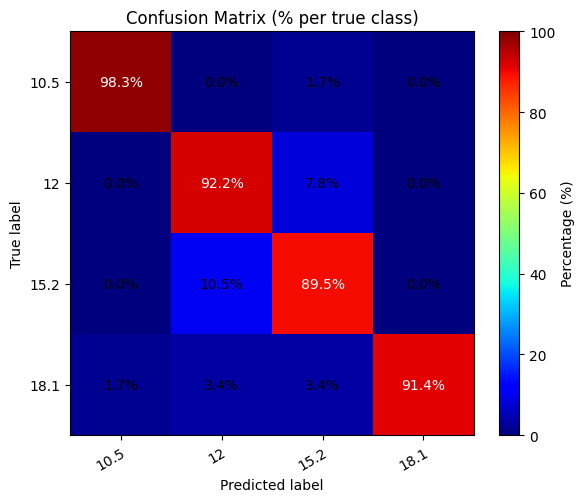

TCNModel_v1_outch64_GELU_head2_smallest: Test accuracy = 0.928

Plotting TCNModel_v1_outch64_GELU_head2_smallest: Test Accuracy = 0.928


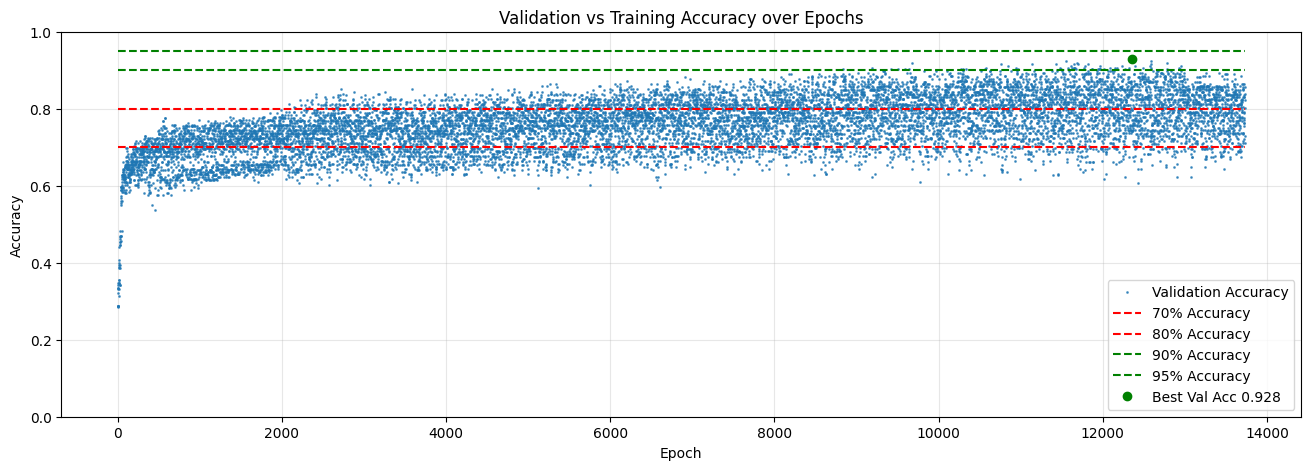


All models processed successfully!



In [2]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
from  Models_1D import TCNModel_withBase
from Dataset_torch import EEGDataset_with_filters
# models = [TCNModel_withBase,]

from Random_models import (
                          #  TCNModel_v0, TCNModel_v1, 
                          #  TCNModel_v1_d16, TCNModel_v1_d32, TCNModel_v1_d_repeat, TCNModel_v1_d_aggressive,
                          #  TCNModel_v1_k4, TCNModel_v1_k5,
                          #  TCNModel_v1_SiLU, TCNModel_v1_LeakyReLU, TCNModel_v1_ELU, TCNModel_v1_GELU,
                          #  TCNModel_v1_outch64_GELU, TCNModel_v1_outch128_GELU,
                          #  TCNModel_d32_outch64_GELU, TCNModel_d32_outch128_GELU,
                          # TCNModel_v1_outch64_LeakyReLU,
                          # TCNModel_v1_outch64_ReLU,
                          # TCNModel_d32_outch64_LeakyReLU,
                          # TCNModel_d32_outch64_ReLU,
                          
                          # TCNModel_v1_outch64_GELU_d_repeated,
                          # TCNModel_v1_outch64_GELU_head1,
                          TCNModel_v1_outch64_GELU_head2,
                          TCNModel_v1_outch64_GELU_head2_small,
                          TCNModel_v1_outch64_GELU_head2_smallest

                          # TCNModel_v1_outch64_GELU_pool1,
                          # TCNModel_v1_outch64_GELU_pool2,
                          # TCNModel_v1_outch64_GELU_pool3,
                          # TCNModel_v1_outch64_GELU_head2_pool1,
                          # TCNModel_v1_outch64_GELU_head2_pool2,
                          )

# list of TCN model variants for experimentation
models = [
        #   TCNModel_v0, 
          # TCNModel_v1, 
          
        #   TCNModel_v1_d16, 
        #  TCNModel_v1_d32, 
          # TCNModel_v1_d_repeat, TCNModel_v1_d_aggressive,
          # TCNModel_v1_k4, TCNModel_v1_k5,
          # TCNModel_v1_SiLU, TCNModel_v1_LeakyReLU, TCNModel_v1_ELU, TCNModel_v1_GELU,
          # TCNModel_v1_outch64, 
          # TCNModel_v1_outch128,
          # TCNModel_d32_outch64,
          # TCNModel_d32_outch128,
            # TCNModel_v1_outch64_LeakyReLU,
          # TCNModel_v1_outch64_ReLU,
            # TCNModel_d32_outch64_LeakyReLU,
          # TCNModel_d32_outch64_ReLU,
          
          # TCNModel_v1_outch64_GELU_d_repeated,
          # TCNModel_v1_outch64_GELU_head1,
          # TCNModel_v1_outch64_GELU_head2,
          # TCNModel_v1_outch64_GELU_head2_small,
          TCNModel_v1_outch64_GELU_head2_smallest,
          
          
          # TCNModel_v1_outch64_GELU_head2_pool1,
          # TCNModel_v1_outch64_GELU_head2_pool2,

          # TCNModel_v1_outch64_GELU_pool1,
          # TCNModel_v1_outch64_GELU_pool2,
          # TCNModel_v1_outch64_GELU_pool3,
]


shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:01:00:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        "num_classes": 4,
        "class_labels": [10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0],
    },
    "SUMMARY": True,
    "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TCNModel_v1_d32/version_2_932/checkpoints/best-1807-val_acc=0.898.ckpt",              # best 4 label model after retraining
    # "LOAD_CHECKPOINT": "logs/TCNModel_v1_outch64_GELU_head2/version_3_958_1h/checkpoints/best-9708-val_acc=0.975.ckpt",    # 1h 
    # "LOAD_CHECKPOINT": "logs/TCNModel_v1_outch64_GELU_head2_small/version_0_4_954_1h/checkpoints/best-10840-val_acc=0.953.ckpt",    # 1h 
    "LOAD_CHECKPOINT": "logs/TCNModel_v1_outch64_GELU_head2_smallest/version_0_4_928_1h/checkpoints/best-12358-val_acc=0.928.ckpt",    # 1h 
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Training on the side 

Loading data from: datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz
Data loaded: X=(1576, 8, 375), y=(1576,)
Dataset split: Train=1103, Val=236, Test=237
Dataloaders ready

Processing  TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D...

Training TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D...

Best model saved at: logs/TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D/version_2/checkpoints/best-21-val_acc=0.513.ckpt
Class 10.5 accuracy: 0.828
Class 12 accuracy: 0.078
Class 15.2 accuracy: 0.737
Class 18.1 accuracy: 0.448


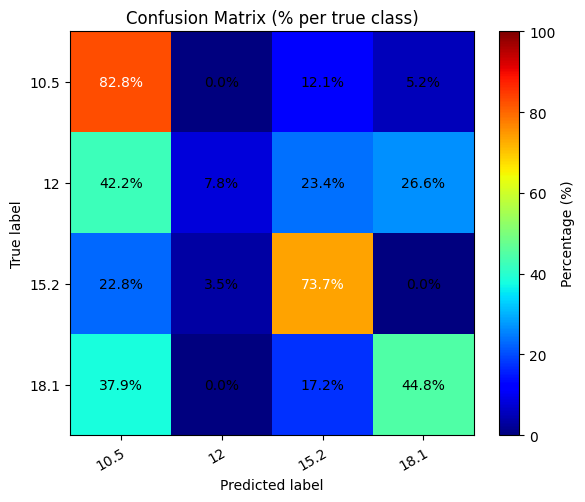

TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D: Test accuracy = 0.511

Plotting TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D: Test Accuracy = 0.511


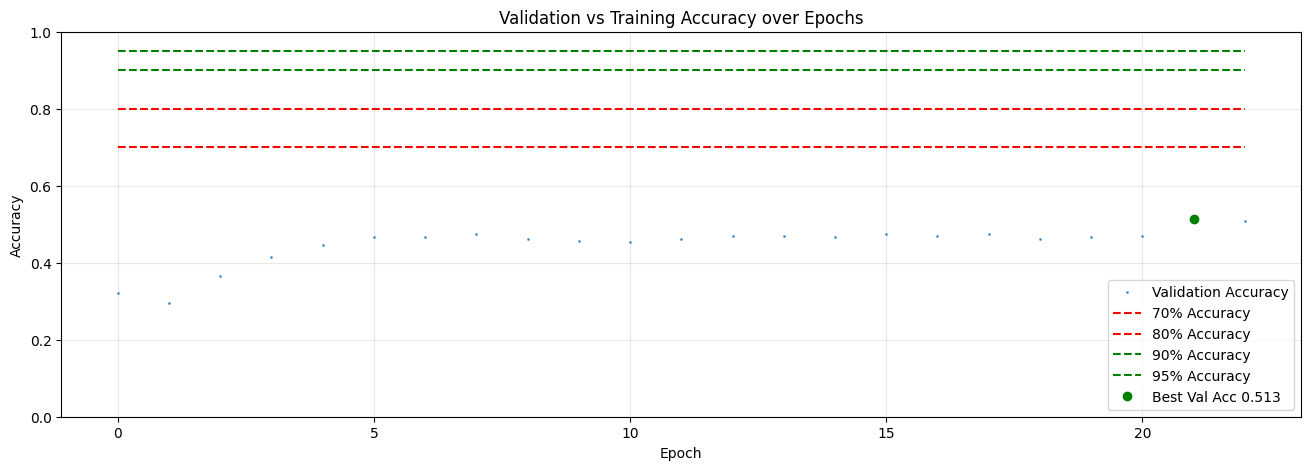


Processing  TCNModel_withBase_v3_DepthwiseSeparableConv1D...

Training TCNModel_withBase_v3_DepthwiseSeparableConv1D...

Best model saved at: logs/TCNModel_withBase_v3_DepthwiseSeparableConv1D/version_2/checkpoints/best-32-val_acc=0.572.ckpt
Class 10.5 accuracy: 0.810
Class 12 accuracy: 0.375
Class 15.2 accuracy: 0.789
Class 18.1 accuracy: 0.431


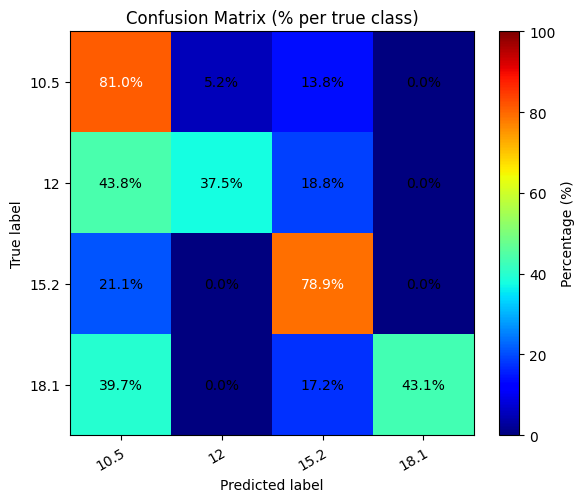

TCNModel_withBase_v3_DepthwiseSeparableConv1D: Test accuracy = 0.595

Plotting TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D: Test Accuracy = 0.595


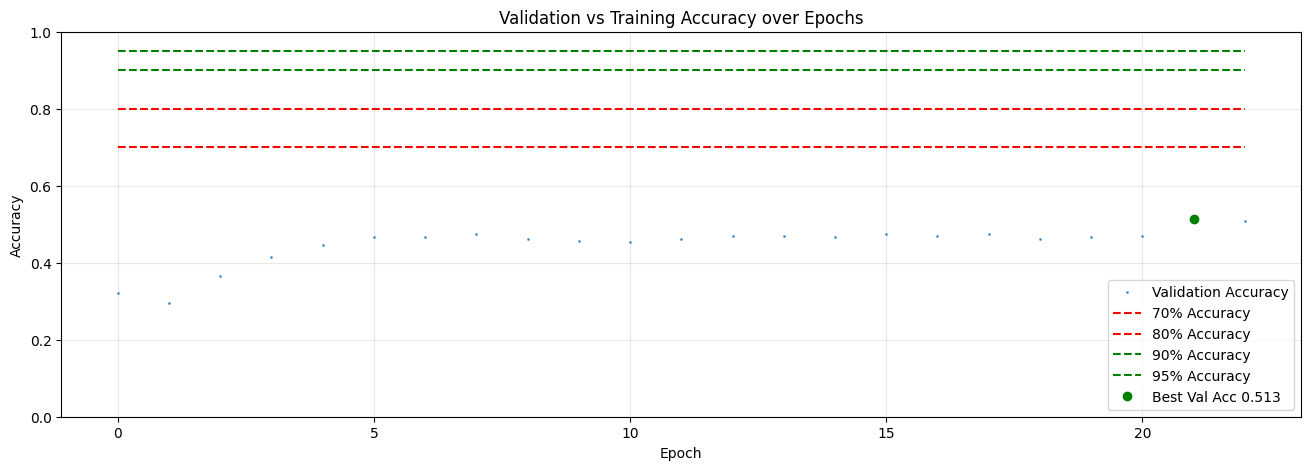


Plotting TCNModel_withBase_v3_DepthwiseSeparableConv1D: Test Accuracy = 0.595


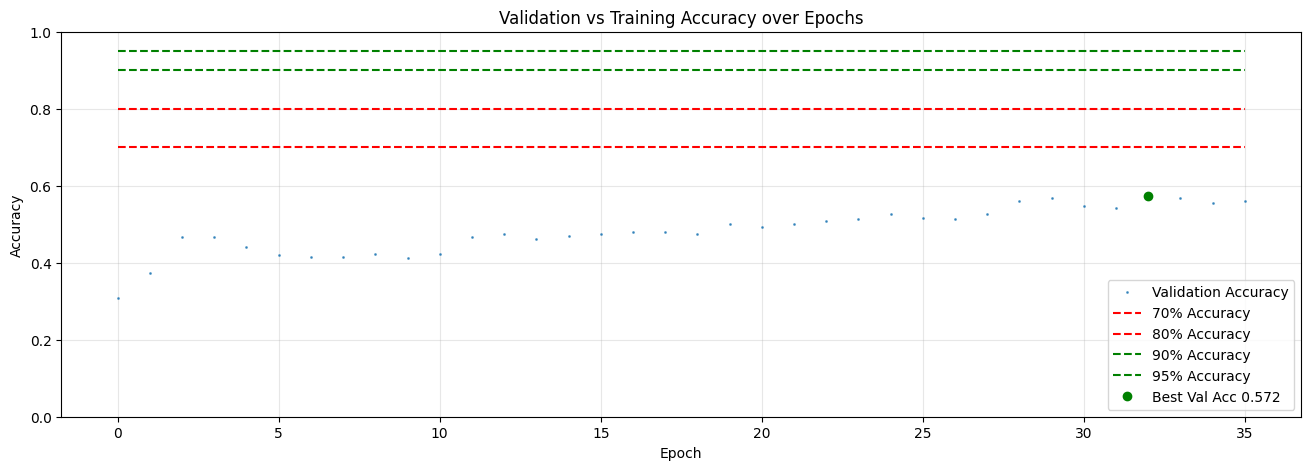


Processing  TCNModel_withBase_v2_ResidualTCNBlock...

Training TCNModel_withBase_v2_ResidualTCNBlock...

Best model saved at: logs/TCNModel_withBase_v2_ResidualTCNBlock/version_2/checkpoints/best-34-val_acc=0.542.ckpt
Class 10.5 accuracy: 0.776
Class 12 accuracy: 0.203
Class 15.2 accuracy: 0.667
Class 18.1 accuracy: 0.466


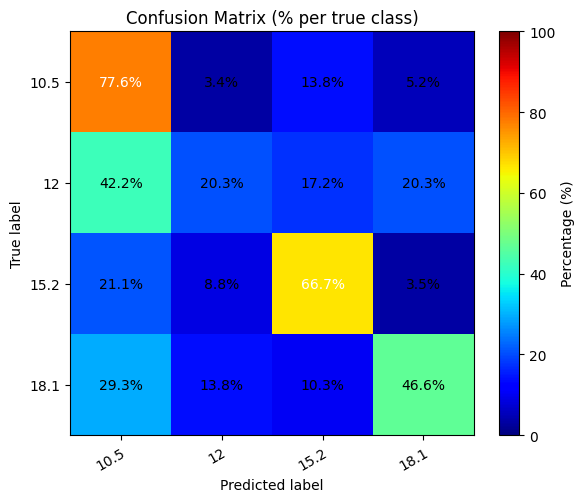

TCNModel_withBase_v2_ResidualTCNBlock: Test accuracy = 0.519

Plotting TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D: Test Accuracy = 0.519


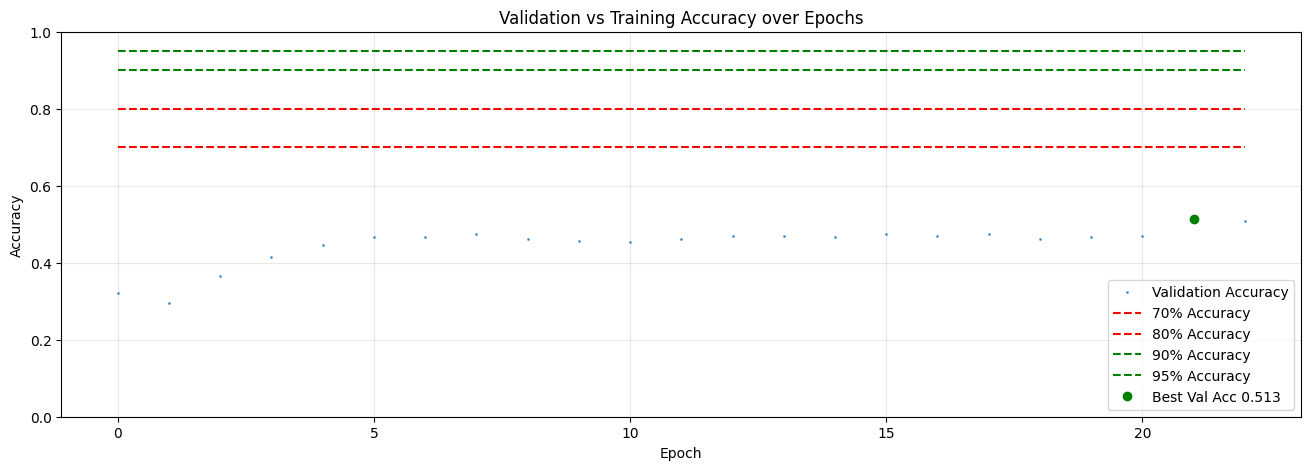


Plotting TCNModel_withBase_v3_DepthwiseSeparableConv1D: Test Accuracy = 0.519


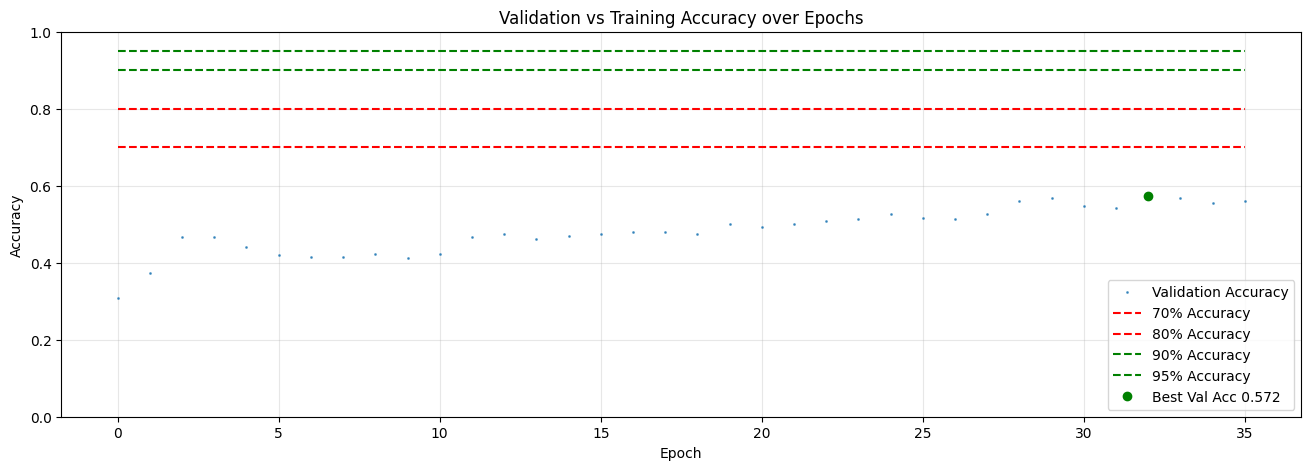


Plotting TCNModel_withBase_v2_ResidualTCNBlock: Test Accuracy = 0.519


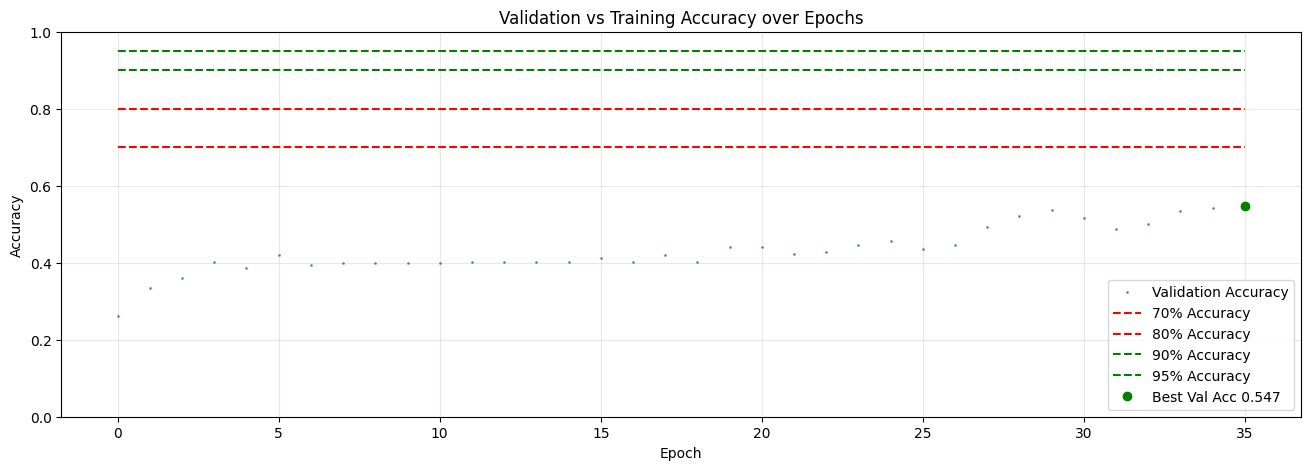


Processing  EEGTransformerLite_withBase...

Training EEGTransformerLite_withBase...

Best model saved at: logs/EEGTransformerLite_withBase/version_1/checkpoints/best-27-val_acc=0.551.ckpt
Class 10.5 accuracy: 0.810
Class 12 accuracy: 0.422
Class 15.2 accuracy: 0.421
Class 18.1 accuracy: 0.466


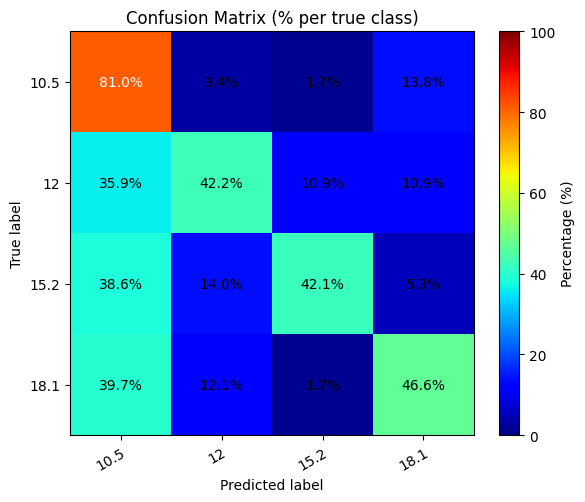

EEGTransformerLite_withBase: Test accuracy = 0.527

Plotting TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D: Test Accuracy = 0.527


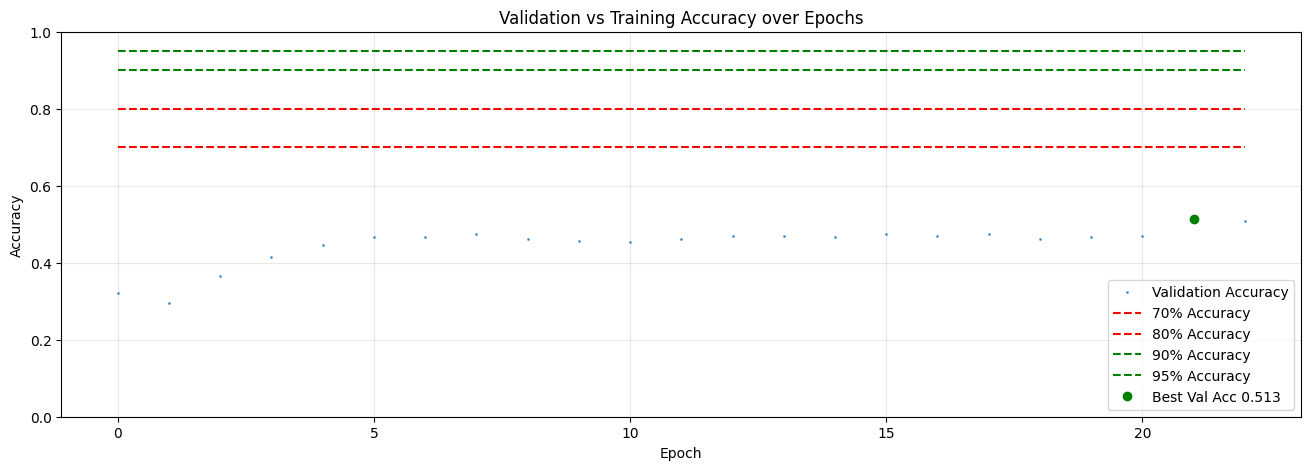


Plotting TCNModel_withBase_v3_DepthwiseSeparableConv1D: Test Accuracy = 0.527


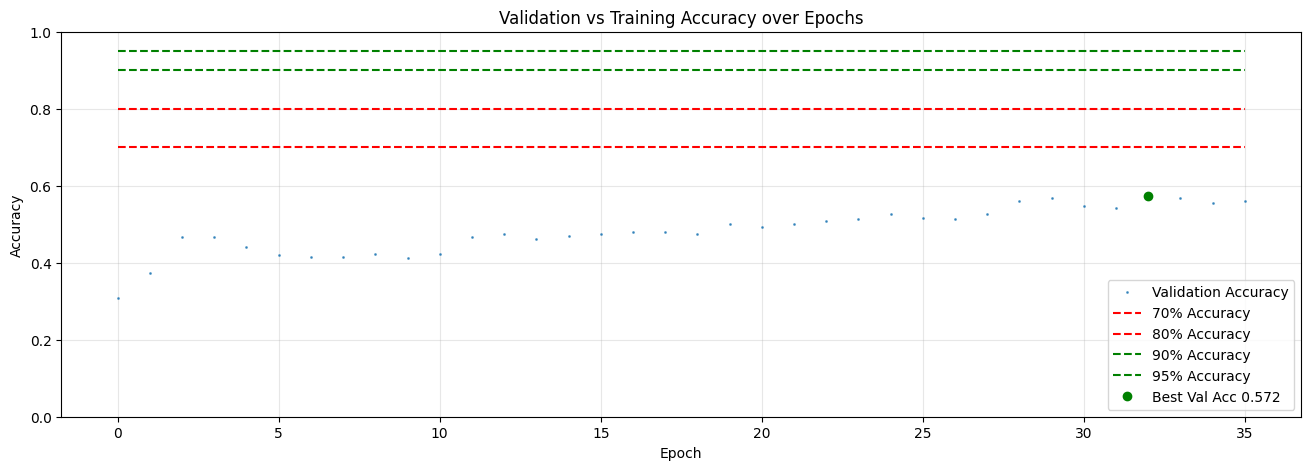


Plotting TCNModel_withBase_v2_ResidualTCNBlock: Test Accuracy = 0.527


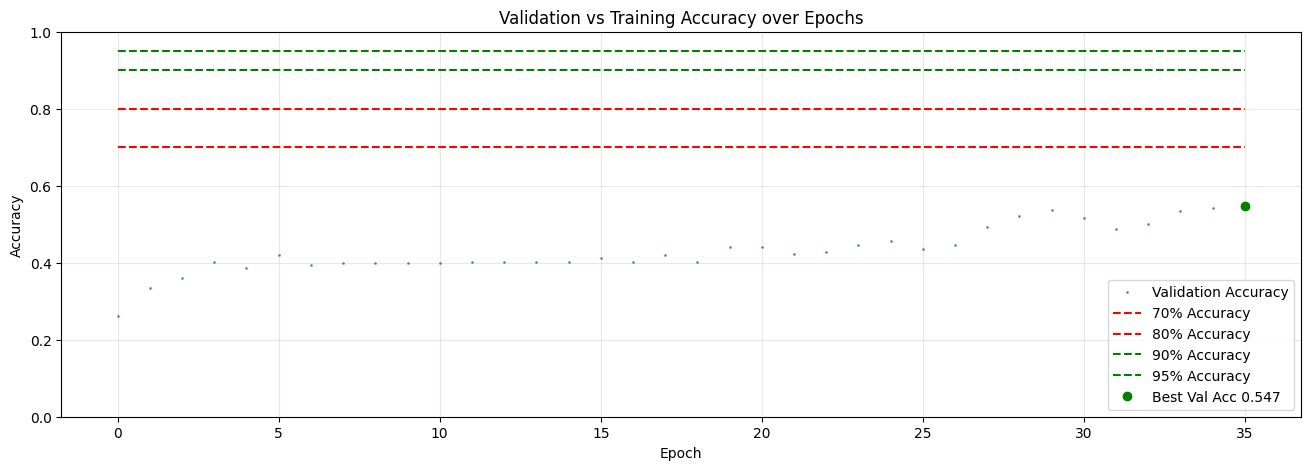


Plotting EEGTransformerLite_withBase: Test Accuracy = 0.527


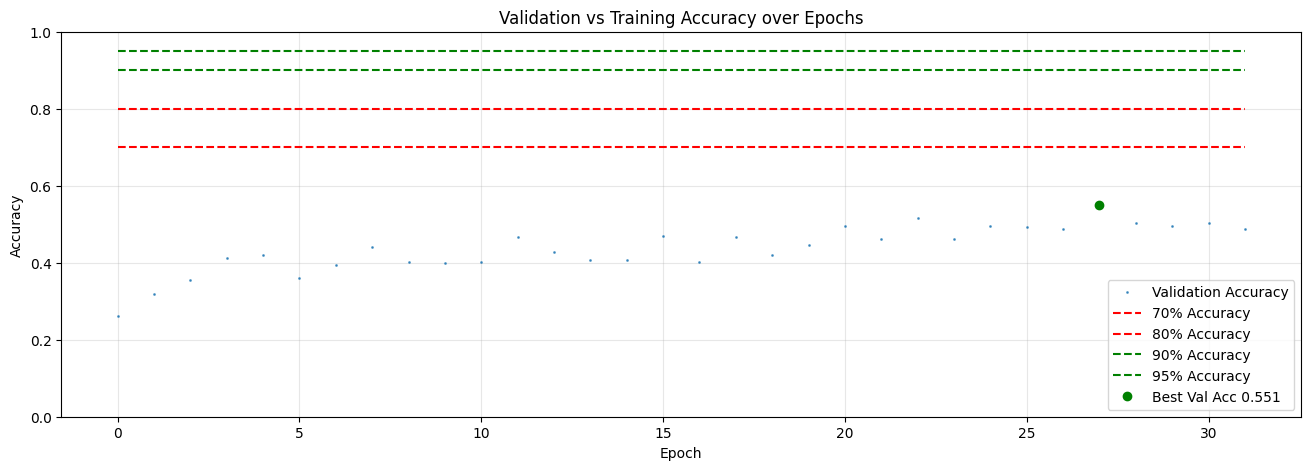


Processing  TCNAttentionModel_withBase...

Training TCNAttentionModel_withBase...

Best model saved at: logs/TCNAttentionModel_withBase/version_0/checkpoints/best-21-val_acc=0.504.ckpt
Class 10.5 accuracy: 0.828
Class 12 accuracy: 0.219
Class 15.2 accuracy: 0.456
Class 18.1 accuracy: 0.328


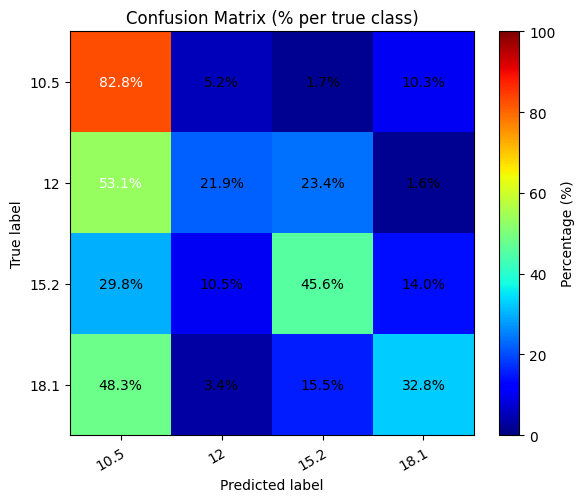

TCNAttentionModel_withBase: Test accuracy = 0.451

Plotting TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D: Test Accuracy = 0.451


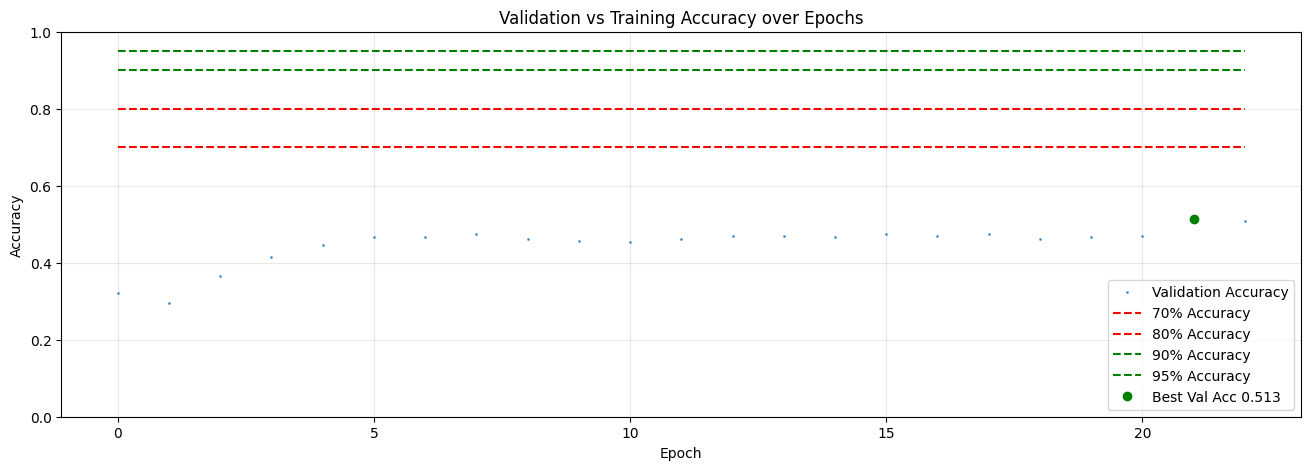


Plotting TCNModel_withBase_v3_DepthwiseSeparableConv1D: Test Accuracy = 0.451


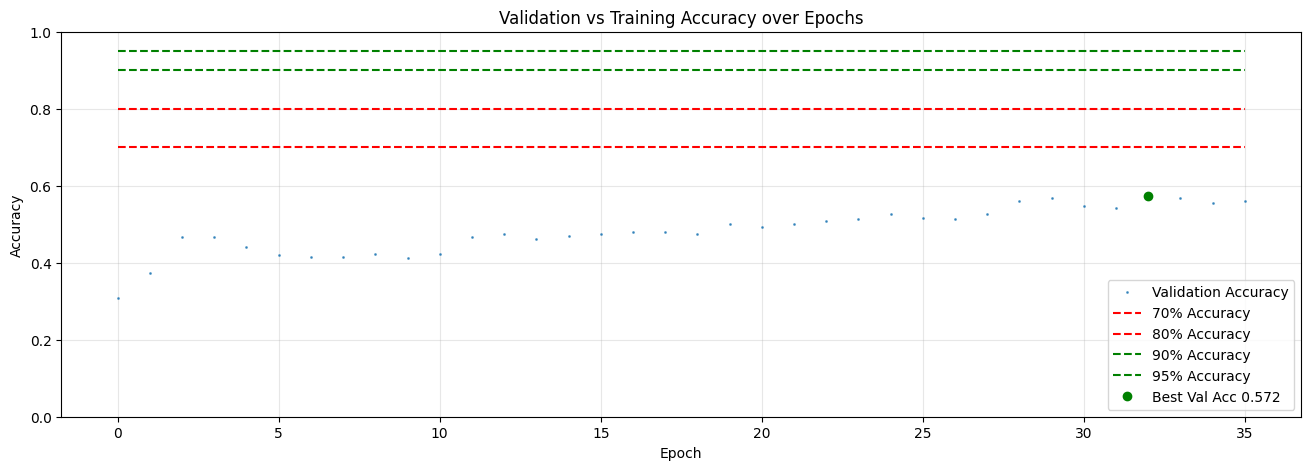


Plotting TCNModel_withBase_v2_ResidualTCNBlock: Test Accuracy = 0.451


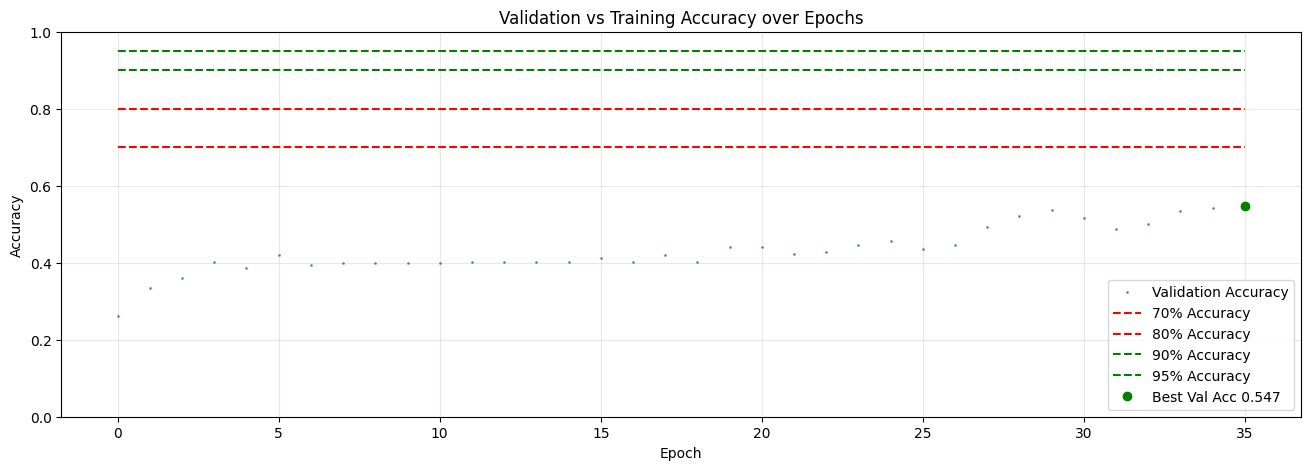


Plotting EEGTransformerLite_withBase: Test Accuracy = 0.451


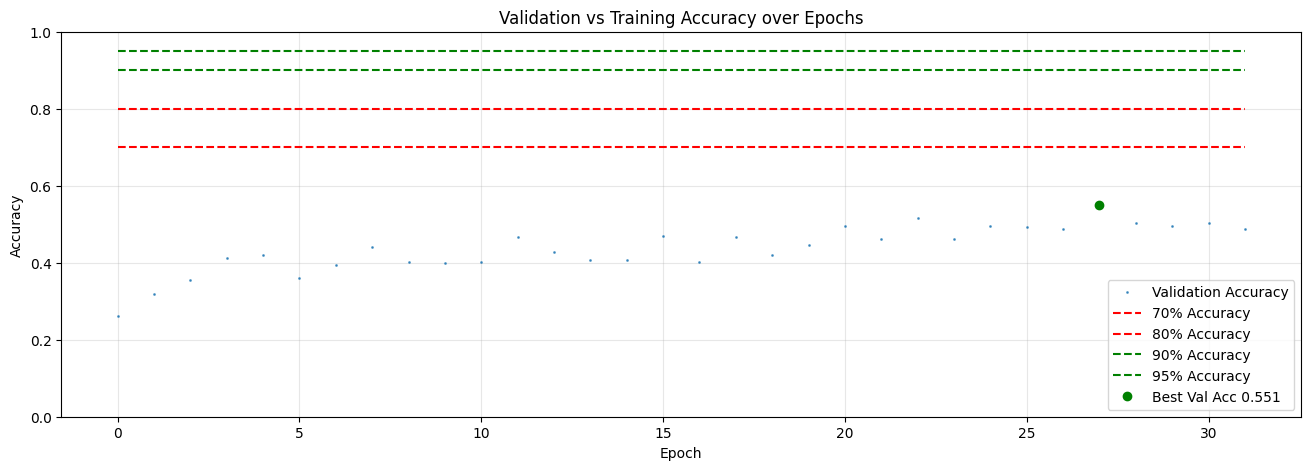


Plotting TCNAttentionModel_withBase: Test Accuracy = 0.451


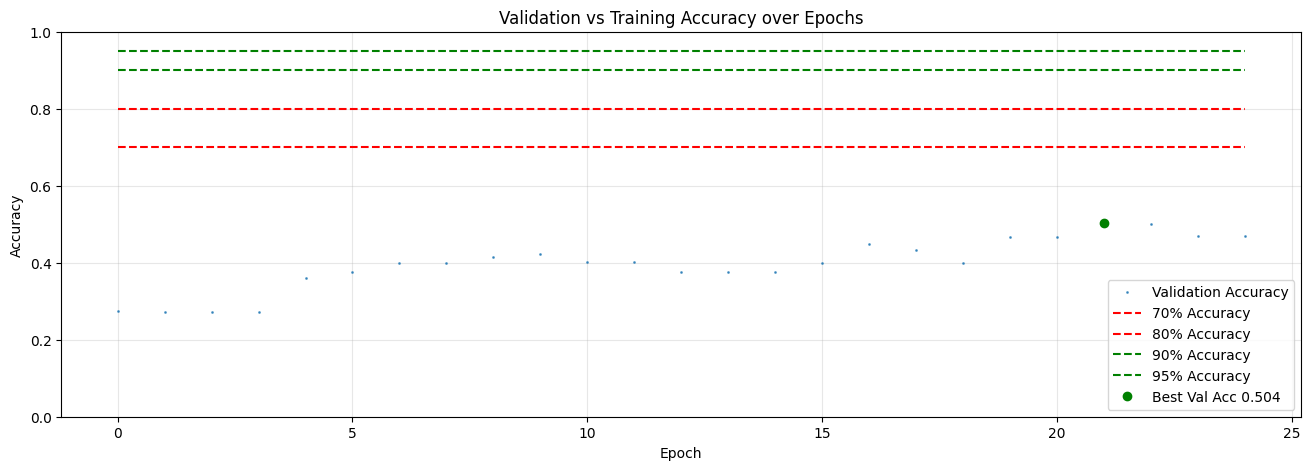


Processing  SpectroCNN_withBase...

Training SpectroCNN_withBase...

Error training SpectroCNN_withBase: module 'torchaudio' has no attribute 'transformsSpectrogram'

Processing  EEGTransformer_withBase...

Training EEGTransformer_withBase...



Traceback (most recent call last):
  File "/home/gtenzing/EEG_Classification/Model_Trainer.py", line 179, in run_multiple_models
    model = ModelClass(**params["MODEL_KWARGS"]).to(device)
            ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gtenzing/EEG_Classification/Random_models.py", line 1136, in __init__
    self.spectrogram = torchaudio.transformsSpectrogram(
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'torchaudio' has no attribute 'transformsSpectrogram'


Best model saved at: logs/EEGTransformer_withBase/version_1/checkpoints/best-25-val_acc=0.538.ckpt
Class 10.5 accuracy: 0.828
Class 12 accuracy: 0.172
Class 15.2 accuracy: 0.614
Class 18.1 accuracy: 0.466


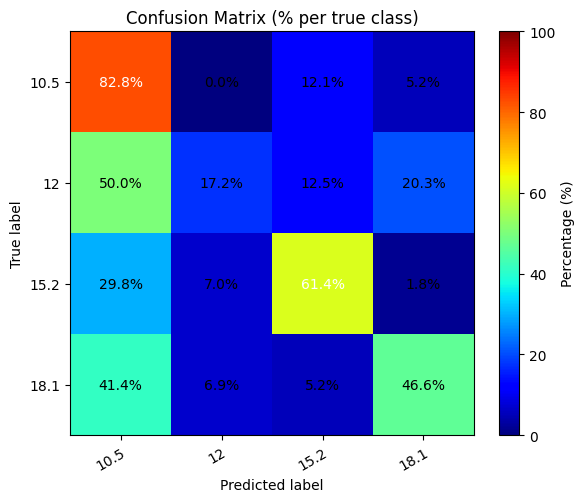

EEGTransformer_withBase: Test accuracy = 0.511

Plotting TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D: Test Accuracy = 0.511


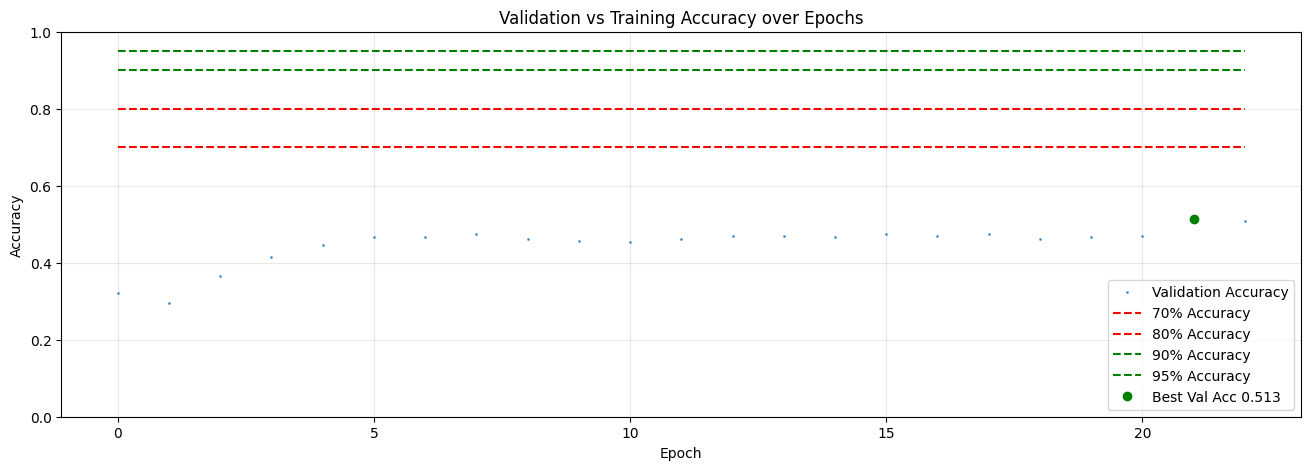


Plotting TCNModel_withBase_v3_DepthwiseSeparableConv1D: Test Accuracy = 0.511


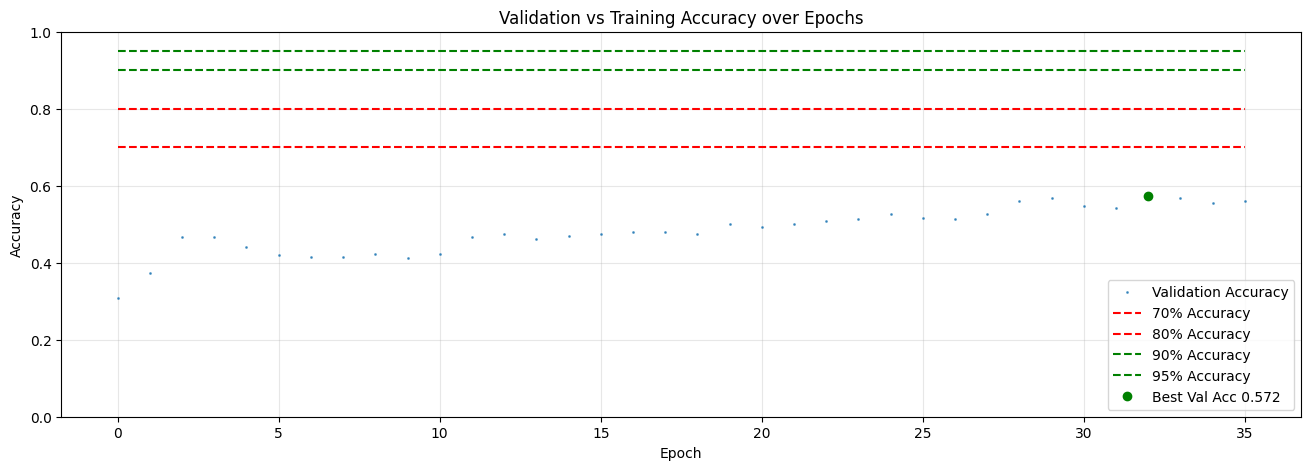


Plotting TCNModel_withBase_v2_ResidualTCNBlock: Test Accuracy = 0.511


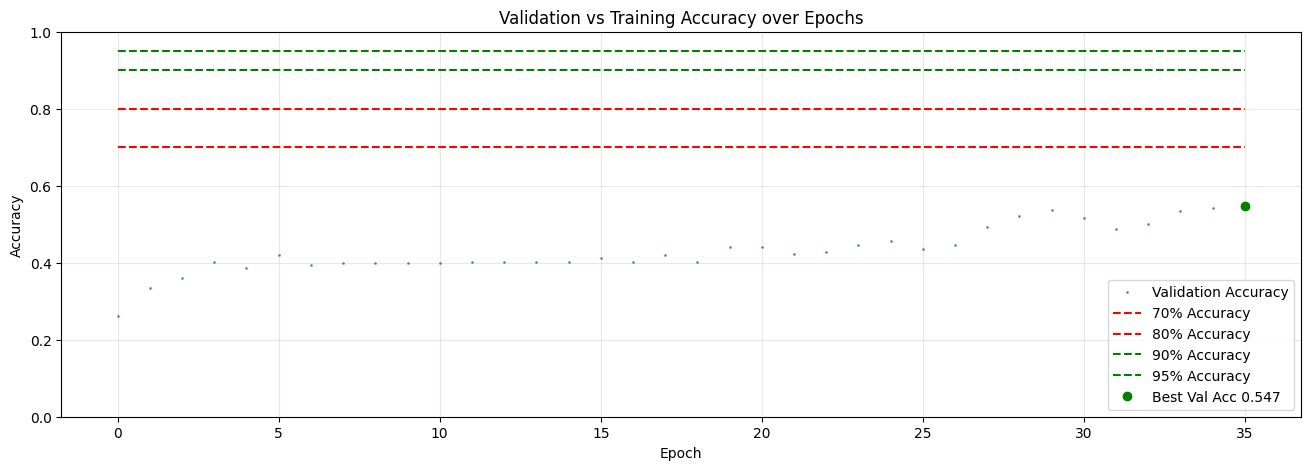


Plotting EEGTransformerLite_withBase: Test Accuracy = 0.511


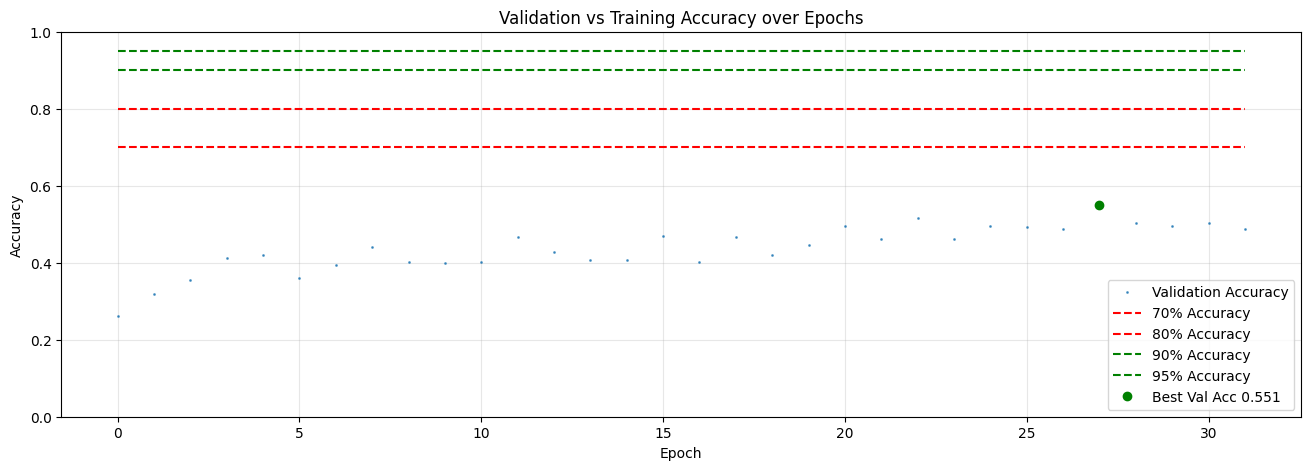


Plotting TCNAttentionModel_withBase: Test Accuracy = 0.511


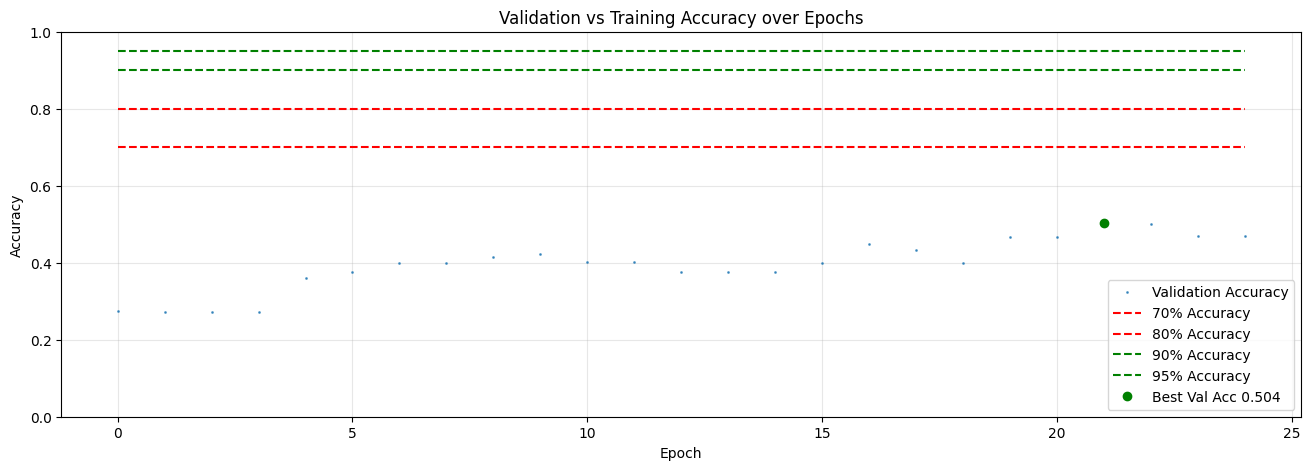


Plotting EEGTransformer_withBase: Test Accuracy = 0.511


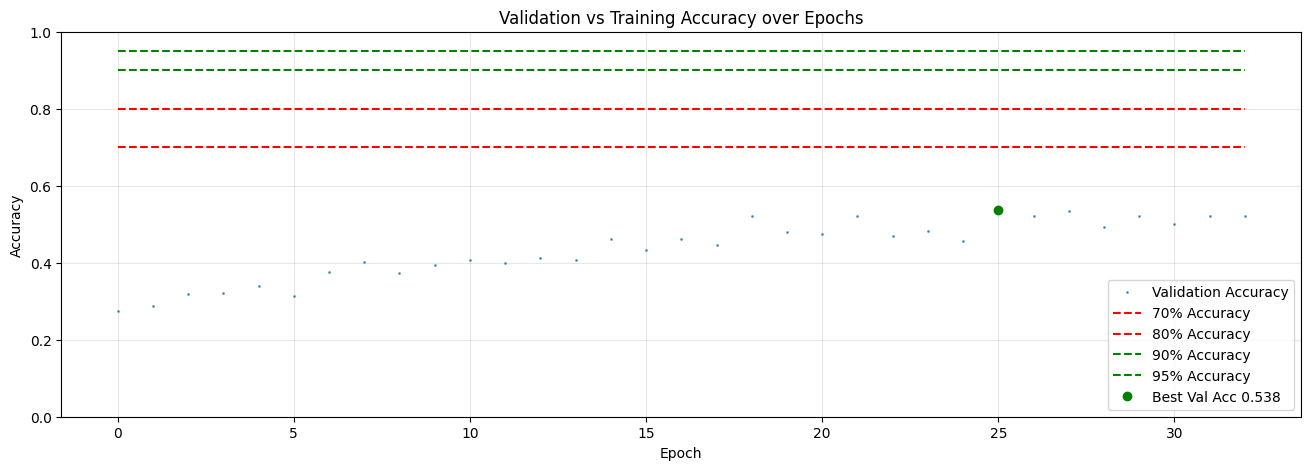


Processing  ShallowConvNet_withBase...

Training ShallowConvNet_withBase...

Error training ShallowConvNet_withBase: mat1 and mat2 shapes cannot be multiplied (256x760 and 1080x4)

Processing  BiLSTMModel_withBase...

Training BiLSTMModel_withBase...



Traceback (most recent call last):
  File "/home/gtenzing/EEG_Classification/Model_Trainer.py", line 182, in run_multiple_models
    trainer.fit(model, train_loader, val_loader)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/trainer.py", line 560, in fit
    call._call_and_handle_interrupt(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self, self._fit_impl, model, train_dataloaders, val_dataloaders, datamodule, ckpt_path
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/call.py", line 49, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
  File "/home/gtenzing/anaconda3/envs/skyforge/lib/python3.13/site-packages/pytorch_lightning/trainer/trainer.py", line 598, in _fit_impl
    self._run(model, ckpt_path=ckpt_p

Best model saved at: logs/BiLSTMModel_withBase/version_1/checkpoints/best-28-val_acc=0.542.ckpt
Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.234
Class 15.2 accuracy: 0.544
Class 18.1 accuracy: 0.310


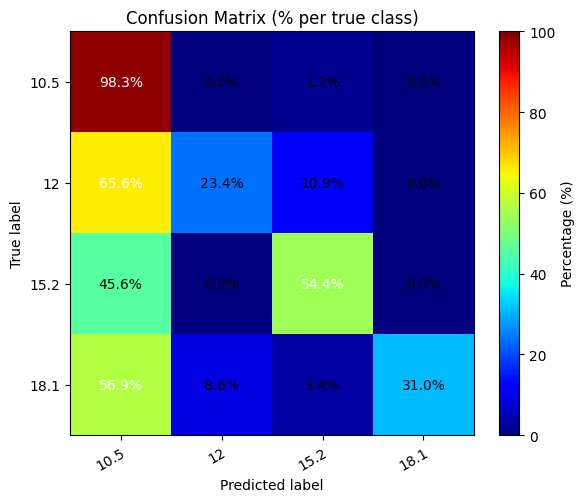

BiLSTMModel_withBase: Test accuracy = 0.511

Plotting TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D: Test Accuracy = 0.511


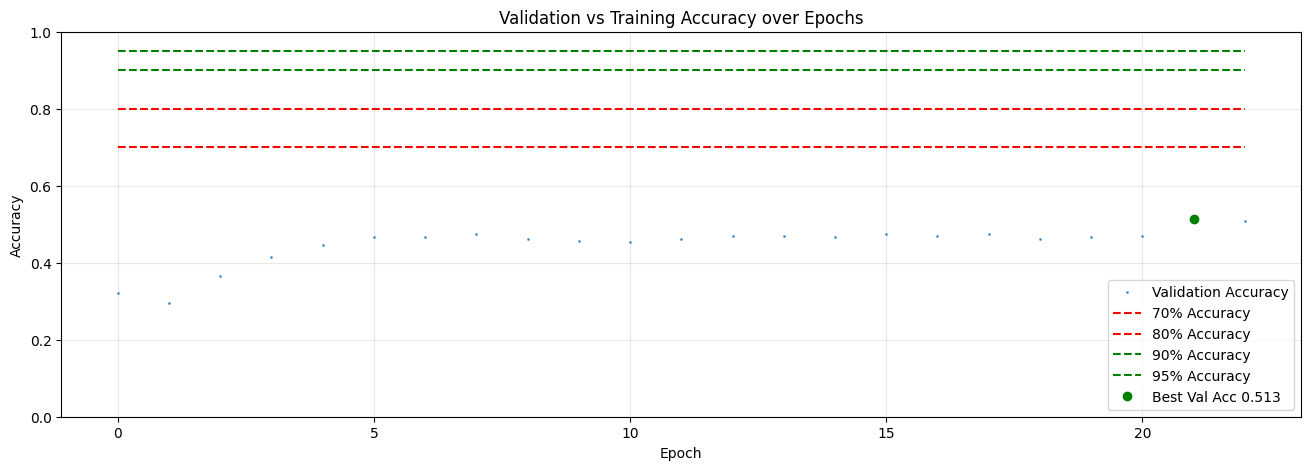


Plotting TCNModel_withBase_v3_DepthwiseSeparableConv1D: Test Accuracy = 0.511


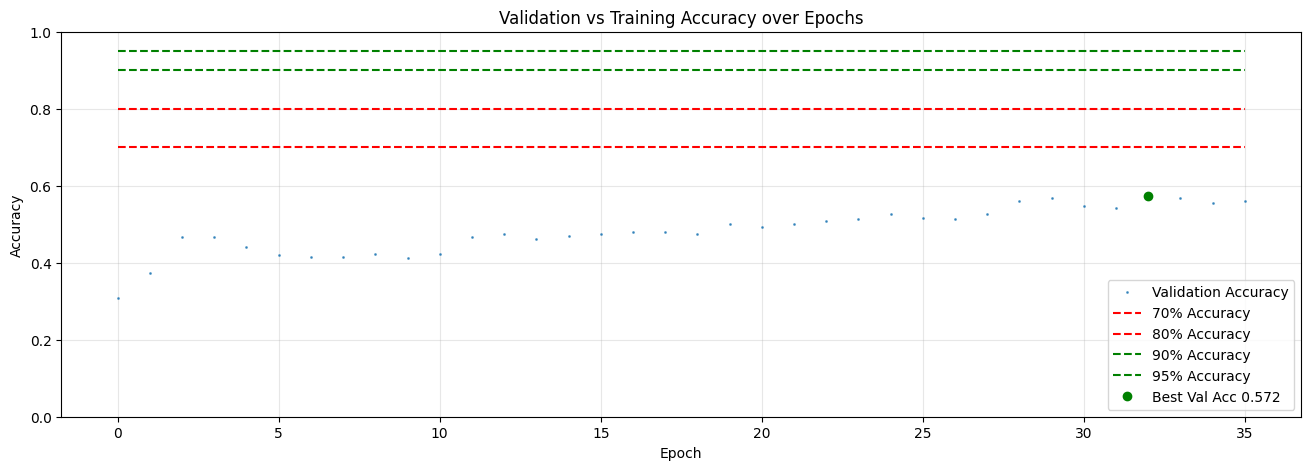


Plotting TCNModel_withBase_v2_ResidualTCNBlock: Test Accuracy = 0.511


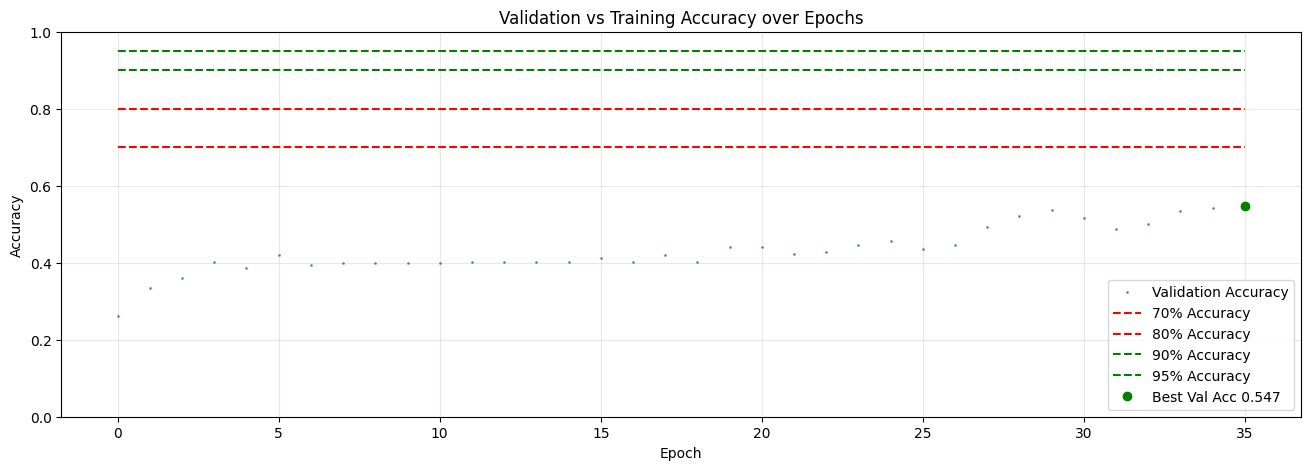


Plotting EEGTransformerLite_withBase: Test Accuracy = 0.511


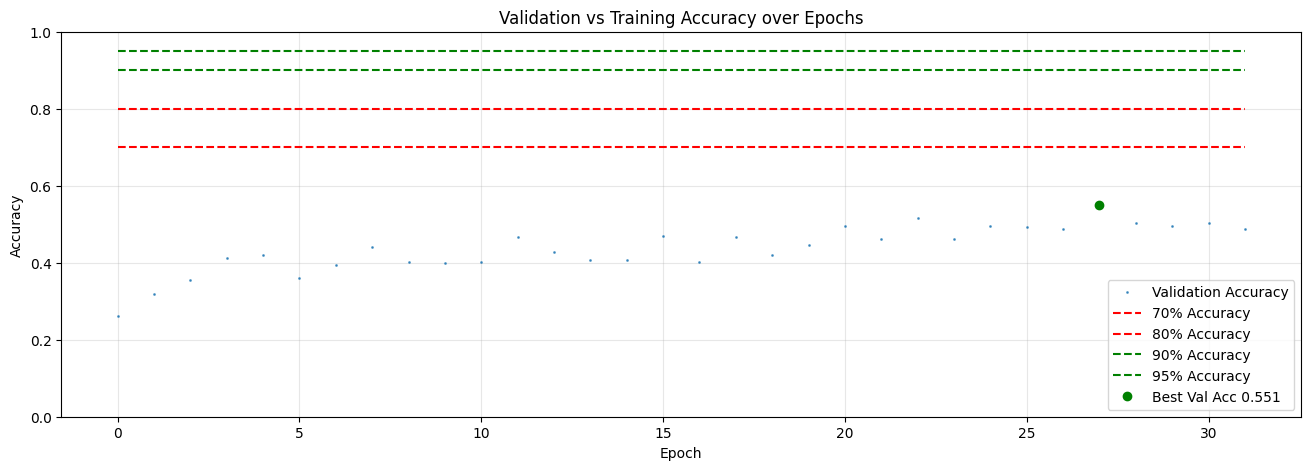


Plotting TCNAttentionModel_withBase: Test Accuracy = 0.511


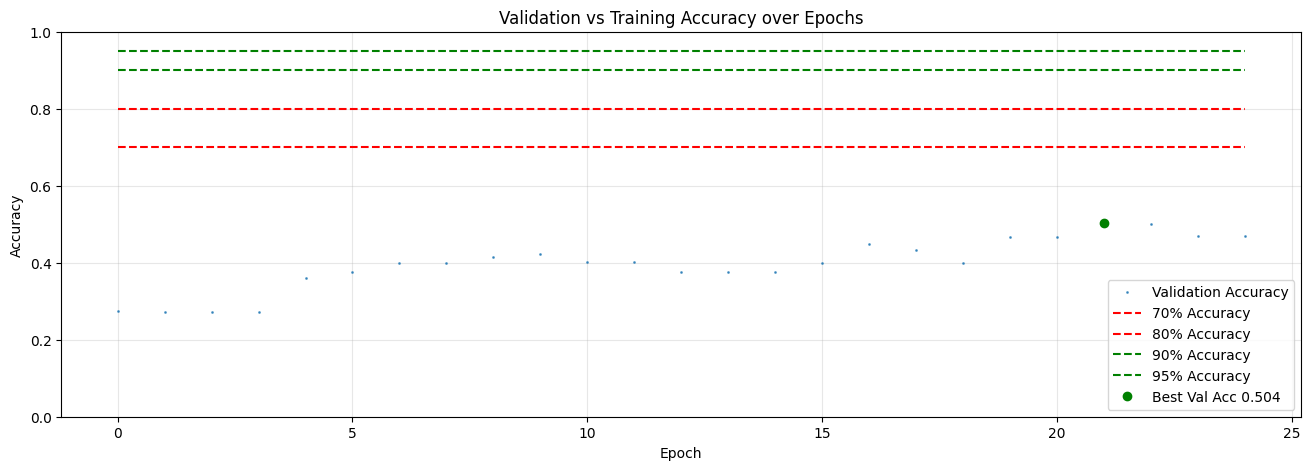


Plotting EEGTransformer_withBase: Test Accuracy = 0.511


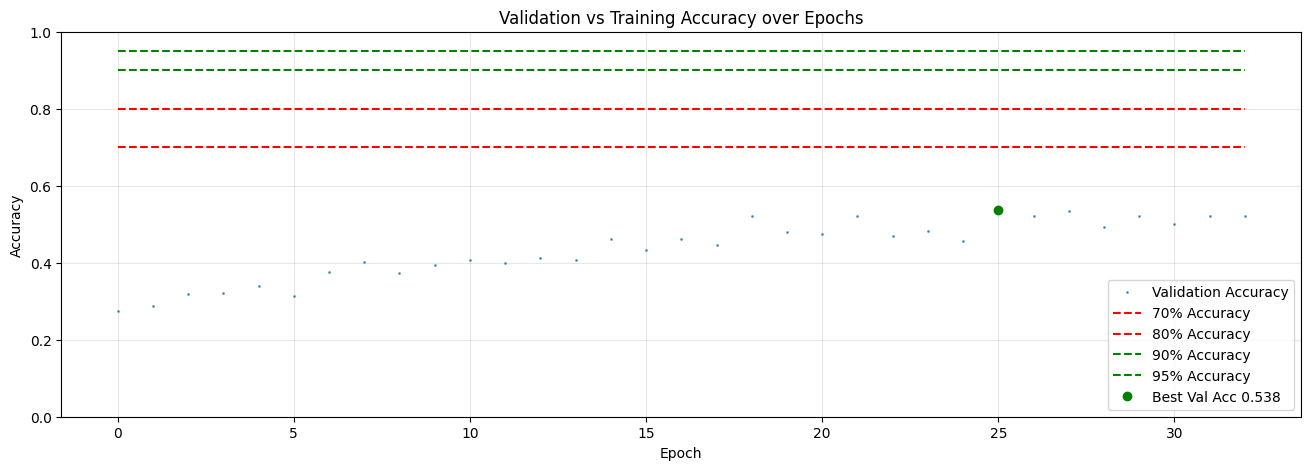


Plotting BiLSTMModel_withBase: Test Accuracy = 0.511


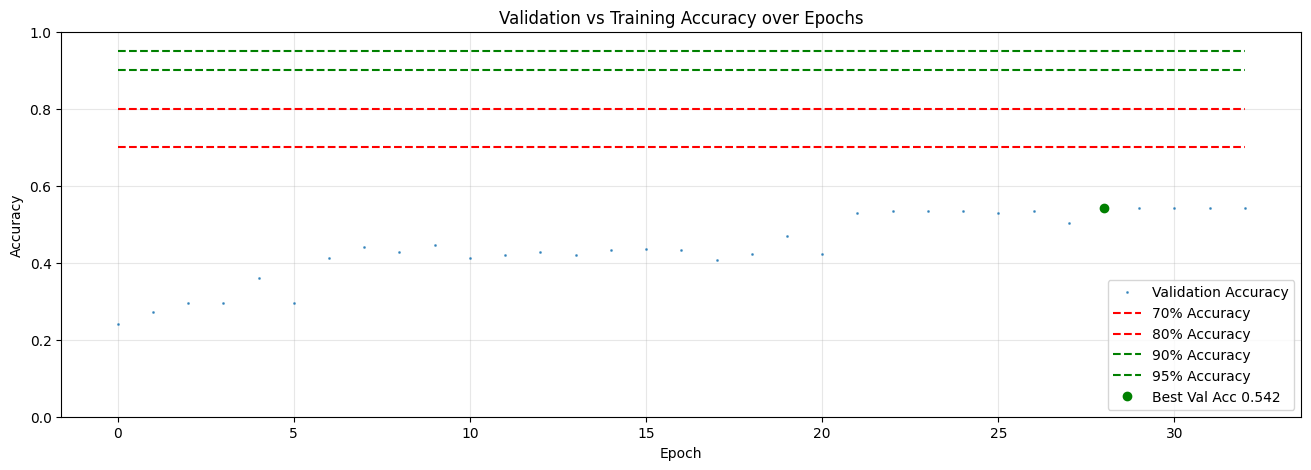


All models processed successfully!



In [1]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
from Dataset_torch import EEGDataset_with_filters
from  Models_1D import TCNModel_withBase, EEGClassifier, MNISTNet, EEGNet
from Random_models import (
                          TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D,
                          TCNModel_withBase_v3_DepthwiseSeparableConv1D,
                          TCNModel_withBase_v2_ResidualTCNBlock,
                          EEGTransformerLite_withBase,
                            TCNAttentionModel_withBase,
                            SpectroCNN_withBase,
                            EEGTransformer_withBase,
                            ShallowConvNet_withBase,
                            BiLSTMModel_withBase,
                          )


models = [
        # EEGClassifier, 
        # MNISTNet, 
        # EEGNet, # error matmul shapes
        
        TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D,
        TCNModel_withBase_v3_DepthwiseSeparableConv1D,
        TCNModel_withBase_v2_ResidualTCNBlock,
        
        EEGTransformerLite_withBase,
        TCNAttentionModel_withBase,
        SpectroCNN_withBase,
        EEGTransformer_withBase,
        ShallowConvNet_withBase,
        BiLSTMModel_withBase,
]


shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:00:00:10",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        "num_classes": 4,
        "class_labels": [10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0],
    },
  
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "",             
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

Loading data from: datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz
Data loaded: X=(2718, 8, 375), y=(2718,)
Dataset split: Train=1902, Val=407, Test=409
Dataloaders ready

Processing  TCNModel_v1_outch64_GELU_head2...

Training TCNModel_v1_outch64_GELU_head2...

Best model saved at: logs/TCNModel_v1_outch64_GELU_head2/version_5/checkpoints/best-11801-val_acc=0.894.ckpt
Class 0 accuracy: 0.799
Class 10.5 accuracy: 0.953
Class 12.0 accuracy: 0.967
Class 15.2 accuracy: 0.918
Class 18.1 accuracy: 0.937


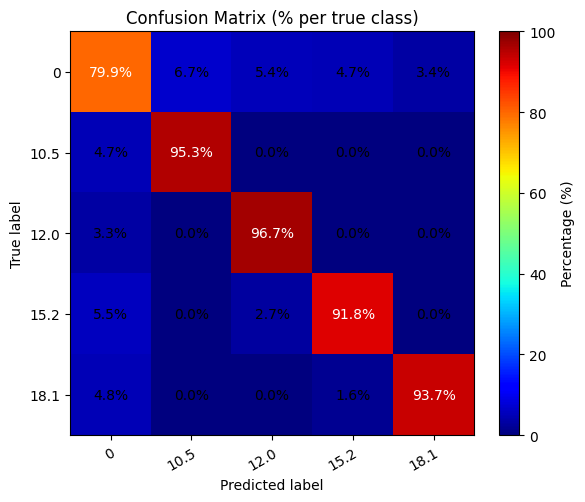

TCNModel_v1_outch64_GELU_head2: Test accuracy = 0.890

Plotting TCNModel_v1_outch64_GELU_head2: Test Accuracy = 0.890


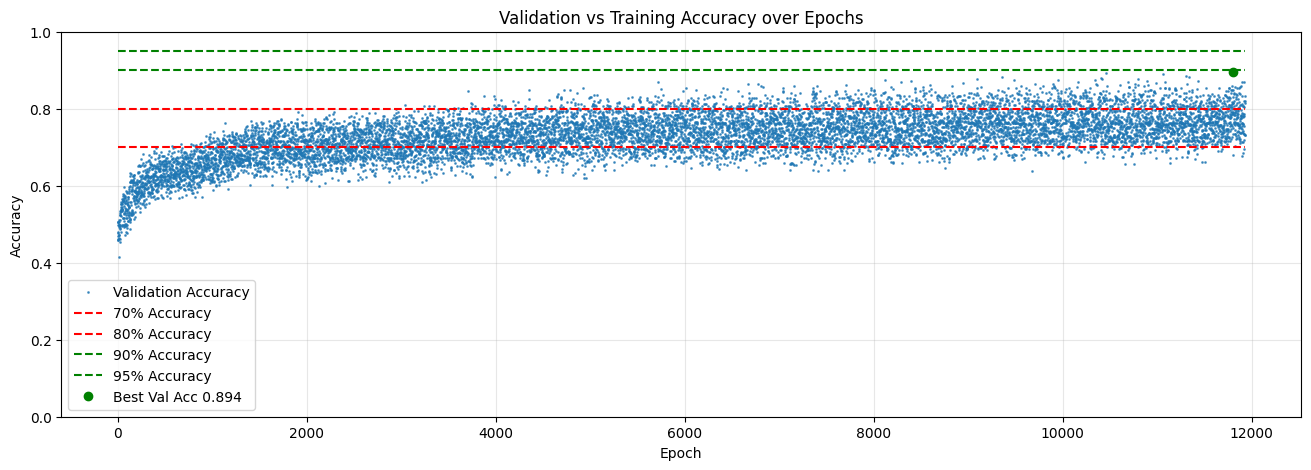


All models processed successfully!



In [1]:
from Model_Trainer import run_multiple_models
from Dataset_torch import EEGDataset_with_filters
from Models_1D import TCNModel_withBase
from Random_models import TCNModel_v1_outch64_GELU_head2

models = [
    TCNModel_v1_outch64_GELU_head2, 
]

shared_parameters_ssvep = { 
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz",   
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:01:00:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 5,
        "class_labels": [0, 10.5, 12.0, 15.2, 18.1],
        "class_weights": [0.5, 1.0, 1.0, 1.0, 1.0], 
    },
    
    # "skip_training": True, 
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_54_5_retrained_best/checkpoints/best-11473-val_acc=0.865.ckpt"
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Training on PhysioNet data (imaginary motor movement)

Loading data from: datasets/numpy_testing/processed_eeg_data_3_7_11_v2_SMALL5.npz
Data loaded: X=(473, 64, 480), y=(473,)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Dataset split: Train=331, Val=70, Test=72
Dataloaders ready

Processing  TCNModel_withBase...

Training TCNModel_withBase...



You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 15.7 K | train
5 | head      | Linear                    | 99     | train
----------------------------------------------------------------
15.8 K    Trainable params
0         Non-trainable

Best model saved at: logs/TCNModel_withBase/version_57/checkpoints/best-4361-val_acc=0.643.ckpt
Class relaxed accuracy: 0.703
Class left_fist accuracy: 0.286
Class right_fist accuracy: 0.143


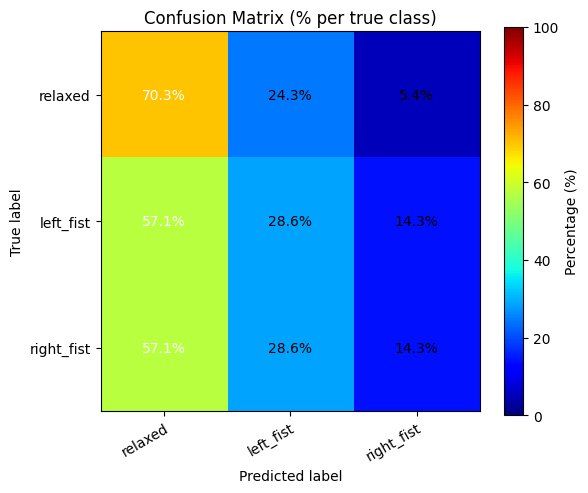

TCNModel_withBase: Test accuracy = 0.458

Plotting TCNModel_withBase: Test Accuracy = 0.458


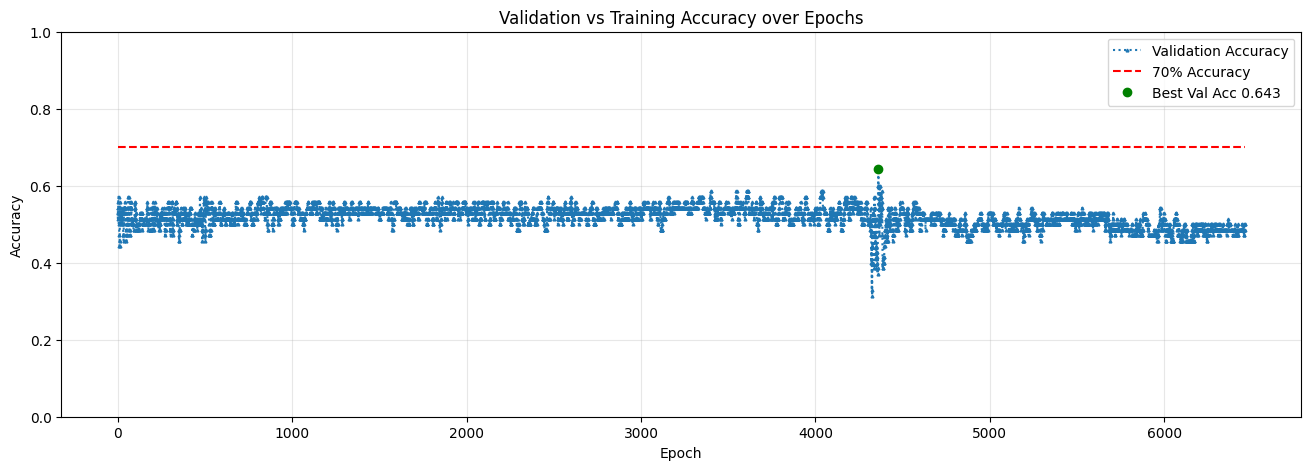


All models processed successfully!



In [1]:

from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
import Models_1D
from Dataset_torch import EEGDataset_with_filters

models = [
    Models_1D.TCNModel_withBase, 
]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy_testing/processed_eeg_data_3_7_11_v2_SMALL5.npz",  # about 10 subjects  
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 256,
    "NUM_WORKERS": 4,
    "PREFETCH_FACTOR": 2,
    
    "MAX_TIME": "00:00:30:00",
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 3,
        "class_labels": ["relaxed", "left_fist", "right_fist"],
        "class_weights": [1.0, 1.3, 1.3],
    },
    
    # "skip_training": True,
    "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_56_fist/checkpoints/best-153-val_acc=0.586.ckpt", 
}  
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Trying Melspetrogram with 2D CNN

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Dataset_torch import EEGDataset, EEGDataset_mel, EEGDataset_mel_with_filters
from Utils import plot_all_results
import Models_2D

models = [
    # Models_2D.EEGClassifier_mel,             # 0.69 on 2mins, 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_with_res,    # 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_small,       # 0.70 on 2mins
    Models_2D.EEGNet_for_mel
]

shared_parameters_ssvep = {
    # "data_path": "datasets/numpy_testing/ssvep_5_filter.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no0.npz",
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels.npz",
    
    "DATASET_CLASS" : EEGDataset_mel_with_filters,
    
    "OCCIPITAL_SLICE": slice(0, 8), 
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 4,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,   
        "class_labels": [10.5, 12, 15.2, 18.1],
    }
}

results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Training on eyes open closed data

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Utils import plot_all_results
from Dataset_torch import EEGDataset_with_filters
import Models_1D
import Random_models

models_ = [
    Models_1D.EEGClassifier,  # with notch on 2mins: 0., test: 0., on 15mins: 0. test: 0.
    ]

models = [
    Random_models.TCNModel_withBase,           # with notch on 2mins: 0.806, test: 0., on 15mins: 0.
]

shared_parameters_eyes = {
    # "data_path": "datasets/numpy/eyes_filter.npz",
    "data_path": "datasets/numpy/processed_eeg_data_eyes.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 256,
    
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 2,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,  
        "class_labels": [0, 1],
    }
}
results, test_loader = run_multiple_models(models, shared_parameters_eyes)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Plot any saved model 

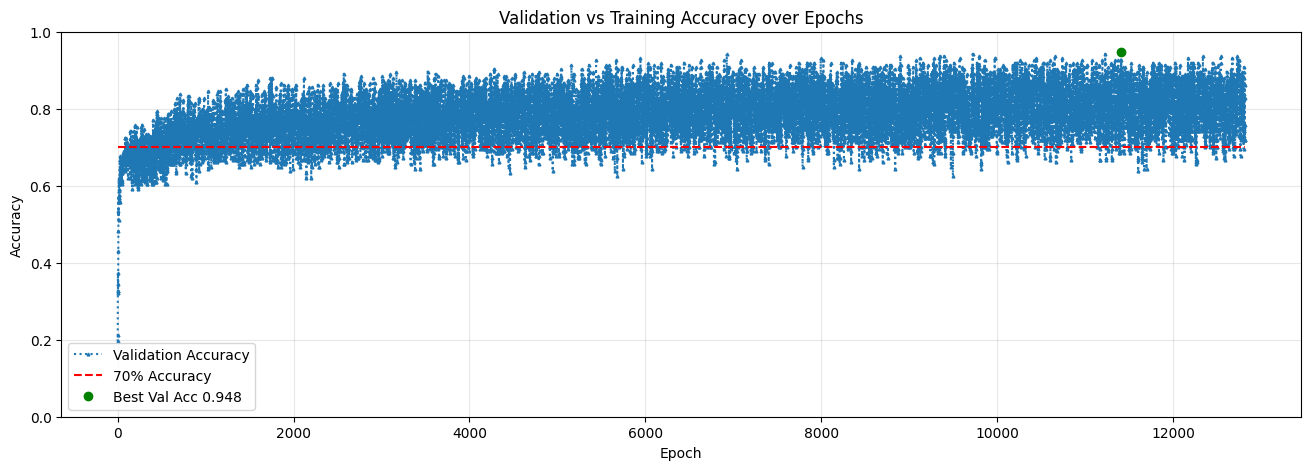

In [3]:
from Utils import plot_training_metrics

csv_path = "logs/TCNModel_withBase/version_12_4_best_1h_GMCGA_no01_4labels/metrics.csv"
plot_training_metrics(csv_path)